> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [233]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
#import pandas
import pandas as pd
#importing numpy
import numpy as np
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#importing matplotlib
import matplotlib.pyplot as plt
# using the inline statement
%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [234]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [236]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [237]:
df.shape

(110527, 14)

In [238]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [239]:
sum(df.duplicated())

0

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [240]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# changing datatype of PatientId to make it readable
df['PatientId'] = df['PatientId'].astype(int)

In [241]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [242]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [243]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [245]:
df = df.rename(columns = {"No-show":"Noshow"})
people_visited = df.query('Noshow == "No"').count().Noshow

In [246]:
people_total = df.shape[0]

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  Noshow          110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [248]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [249]:
 df.drop(['Scholarship'],axis = 1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,1,No


In [250]:
sorted(df.Age.unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115]

In [251]:
df = df[df['Age'] >= 0]

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  int64 
 1   AppointmentID   110526 non-null  int64 
 2   Gender          110526 non-null  object
 3   ScheduledDay    110526 non-null  object
 4   AppointmentDay  110526 non-null  object
 5   Age             110526 non-null  int64 
 6   Neighbourhood   110526 non-null  object
 7   Scholarship     110526 non-null  int64 
 8   Hipertension    110526 non-null  int64 
 9   Diabetes        110526 non-null  int64 
 10  Alcoholism      110526 non-null  int64 
 11  Handcap         110526 non-null  int64 
 12  SMS_received    110526 non-null  int64 
 13  Noshow          110526 non-null  object
dtypes: int64(9), object(5)
memory usage: 12.6+ MB


In [253]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [254]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [255]:
df['Waiting time'] = df['AppointmentDay'] - df['ScheduledDay']

In [256]:
df['Waiting time'] = df['Waiting time'].dt.days
df['Waiting time']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Waiting time, Length: 110526, dtype: int64

In [257]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,Waiting time
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [258]:
df = df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Proportion of people who show up for the test

In [259]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
proportion = people_visited / people_total
print('proportion of people who actually attended the appointment is {}'.format(proportion))
print('percent of people who actually attended the appointment is {}'.format(100 * proportion))
print('proportion of people who not attended the appointment is {}'.format(1 - proportion))
print('percent of people who actually attended the appointment is {}'.format(100 - 100 * proportion))
print('total no. of people who attended the appointment is {}'.format(int(df.shape[0] * proportion)))
print('total no. of people who not attended the appointment is {}'.format(int(df.shape[0] - df.shape[0] * proportion)))

proportion of people who actually attended the appointment is 0.798067440534892
percent of people who actually attended the appointment is 79.8067440534892
proportion of people who not attended the appointment is 0.20193255946510802
percent of people who actually attended the appointment is 20.193255946510803
total no. of people who attended the appointment is 88207
total no. of people who not attended the appointment is 22318


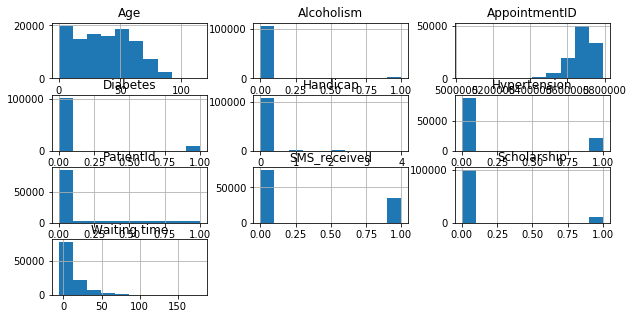

In [260]:
df.hist(figsize=[10,5]);

In [261]:
# including functions for reusing it
def bar(a, b):
    plt.bar(a,b)
def plot(a,b):
    plt.plot(a,b)
def scatter(a,b):
    plt.scatter(x = a,y = b)
def show():
    plt.show()

### Which Gender attended appointment more

In [262]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
women_total = df.query('Gender == "F"').count().Gender
men_total = df.query('Gender == "M"').count().Gender

In [263]:
total = women_total + men_total
total

110526

In [264]:
women = df.query('Gender == "F"')
men = df.query('Gender == "M"')

In [265]:
women_attended_appointment = women.query('Noshow == "No"')
women_attended_appointment.shape[0]

57245

In [266]:
women_proportion = women_attended_appointment.shape[0] / women_total
women_proportion

0.7968512924734475

In [267]:
men_attended_appointment = men.query('Noshow == "No"')
men_attended_appointment.shape[0]

30962

In [268]:
men_proportion = men_attended_appointment.shape[0] / men_total

In [269]:
men_proportion

0.8003205211052808

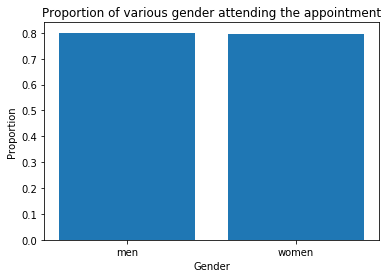

In [270]:
bar(['men','women'],[men_proportion,women_proportion])
plt.title('Proportion of various gender attending the appointment')
plt.xlabel('Gender')
plt.ylabel('Proportion')
show()

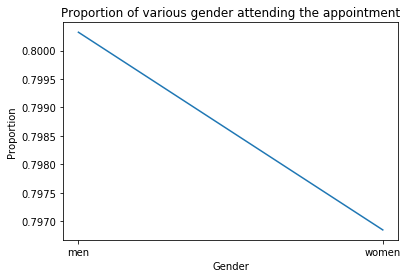

In [271]:
plot(['men','women'],[men_proportion,women_proportion])
plt.title('Proportion of various gender attending the appointment')
plt.xlabel('Gender')
plt.ylabel('Proportion')
show()

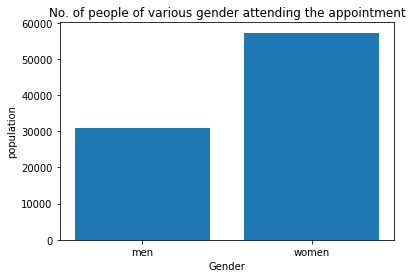

In [272]:
plt.bar(['men','women'],[men_attended_appointment.shape[0],women_attended_appointment.shape[0]])
plt.title('No. of people of various gender attending the appointment')
plt.xlabel('Gender')
plt.ylabel('population')
show()
# the no. of women patient is really high

In [273]:
print('men are more likely to attend appointments rather than women it can be shown from the bar graph and line chart above')

men are more likely to attend appointments rather than women it can be shown from the bar graph and line chart above


### People receiving messages are more likely to attend appointments or not

In [274]:
messages = df.query('SMS_received > 0')

In [275]:
messages.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,Waiting time
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
15,99948393975,5620206,F,2016-04-26,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,3
18,17135378245248,5621836,F,2016-04-26,2016-04-29,30,NOVA PALESTINA,1,0,0,0,0,1,No,3
22,863229818887631,5616091,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,4
25,5819369978796,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No,3


In [276]:
messages.shape[0]

35482

In [277]:
print('People who received messages is {}'.format(messages.shape[0]))

People who received messages is 35482


In [278]:
messages_turned_to_appointments = messages[df["Noshow"] == "No"]

/Users/mrigankanand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [279]:
messages_turned_to_appointments.shape[0]

25698

In [280]:
print('proportion of people attending appointments after receiving messages {}'.format(messages_turned_to_appointments.shape[0] / messages.shape[0]))

proportion of people attending appointments after receiving messages 0.7242545516036301


In [281]:
no_messages = df.query('SMS_received == 0')

In [282]:
no_messages.shape[0]

75044

In [283]:
no_messages_turnedto_appointments = no_messages.query('Noshow == "No"')

In [284]:
no_messages_turnedto_appointments.shape[0]

62509

In [285]:
print('proportion of people attending appointments after not receiving messages {}'.format(no_messages_turnedto_appointments.shape[0] / no_messages.shape[0]))

proportion of people attending appointments after not receiving messages 0.8329646607323703


In [286]:
y_values = [messages_turned_to_appointments.shape[0] / messages.shape[0],no_messages_turnedto_appointments.shape[0] / no_messages.shape[0]]

In [287]:
x_values = ['message_received', 'message_not_received']

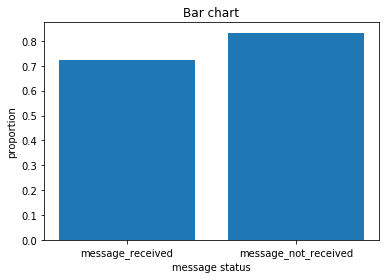

In [288]:
bar(x_values, y_values)
plt.xlabel('message status')
plt.ylabel('proportion')
plt.title('Bar chart')
show()

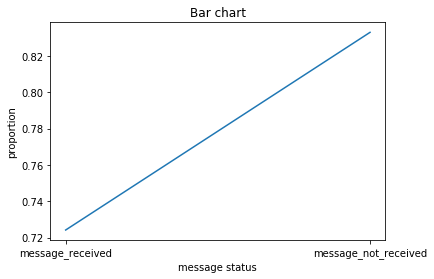

In [289]:
plot(x_values, y_values)
plt.xlabel('message status')
plt.ylabel('proportion')
plt.title('Bar chart')
show();

In [290]:
print('People who are does not receive messages are more likely to attend appointments')

People who are does not receive messages are more likely to attend appointments


### Another Question

In [291]:
disease = df['Hypertension']+df['Diabetes']+df['Alcoholism']+df['Handicap']

In [292]:
sum((disease == 0))

84114

In [293]:
some_disease = df[disease > 0]

In [294]:
somedisease_appointment = some_disease.query('Noshow == "No"')

In [295]:
some_disease.shape[0]

26412

In [296]:
somedisease_appointment.shape[0]

21696

In [297]:
proportion_disease = somedisease_appointment.shape[0] / some_disease.shape[0]

In [298]:
proportion_disease

0.8214447978191731

In [299]:
no_disease = df[disease == 0]

In [300]:
no_disease_appointment = no_disease.query('Noshow == "No"')

In [301]:
no_disease_appointment.shape[0]

66511

In [302]:
proportion_nodisease = no_disease_appointment.shape[0] / no_disease.shape[0]

In [303]:
proportion_nodisease

0.790724492950044

In [304]:
y_label = [proportion_disease, proportion_nodisease]
x_label = ['disease','no disease']

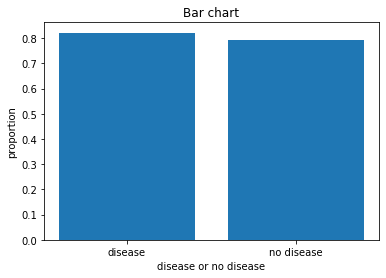

In [305]:
bar(x_label, y_label)
plt.title('Bar chart')
plt.xlabel('disease or no disease')
plt.ylabel('proportion')
show()

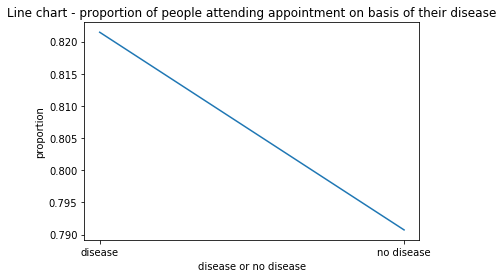

In [306]:
plot(x_label, y_label)
plt.title('Line chart - proportion of people attending appointment on basis of their disease')
plt.xlabel('disease or no disease')
plt.ylabel('proportion')
show()

In [307]:
print('people with disease are more likely to attend appointment rather than who are suffering from some disease it seems like they are more concerned for their health')

people with disease are more likely to attend appointment rather than who are suffering from some disease it seems like they are more concerned for their health


### Appointment attending proportion on the basis of age

In [308]:
t = df.groupby('Age').count().Gender

In [309]:
t

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: Gender, Length: 103, dtype: int64

In [310]:
b = df[df['Noshow'] == "No"].groupby('Age').count().Gender

In [311]:
b

Age
0      2900
1      1858
2      1366
3      1236
4      1017
       ... 
98        5
99        1
100       4
102       2
115       2
Name: Gender, Length: 103, dtype: int64

In [312]:
y_lab = b / t

In [313]:
y_lab

Age
0      0.819441
1      0.817422
2      0.844252
3      0.816920
4      0.782910
         ...   
98     0.833333
99     1.000000
100    1.000000
102    1.000000
115    0.400000
Name: Gender, Length: 103, dtype: float64

In [314]:
x_lab = sorted(df.Age.unique())

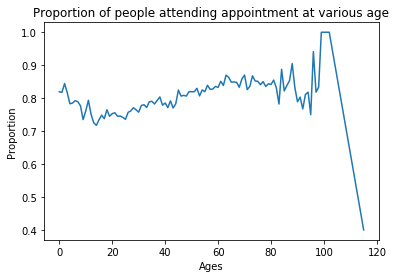

In [315]:
plot(x_lab, y_lab)
plt.title('Proportion of people attending appointment at various age')
plt.xlabel('Ages')
plt.ylabel('Proportion')
show()

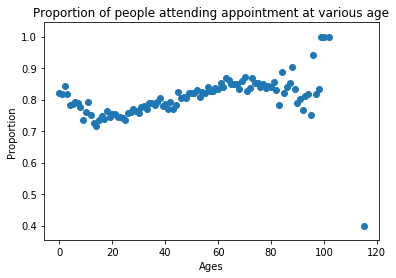

In [316]:
scatter(x_lab, y_lab)
plt.title('Proportion of people attending appointment at various age')
plt.xlabel('Ages')
plt.ylabel('Proportion')
show();

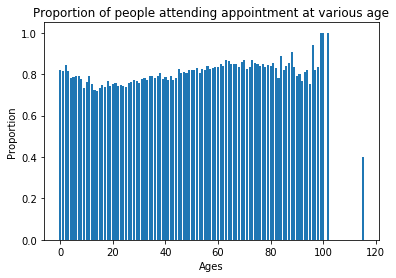

In [317]:
bar(x_lab, y_lab)
plt.title('Proportion of people attending appointment at various age')
plt.xlabel('Ages')
plt.ylabel('Proportion')
show()

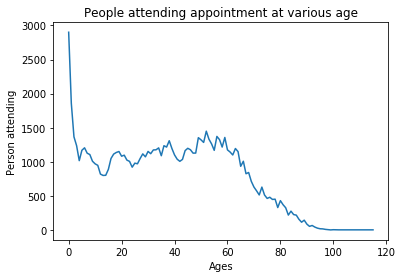

In [318]:
plot(x_lab, b)
plt.title('People attending appointment at various age')
plt.xlabel('Ages')
plt.ylabel('Person attending')
show()

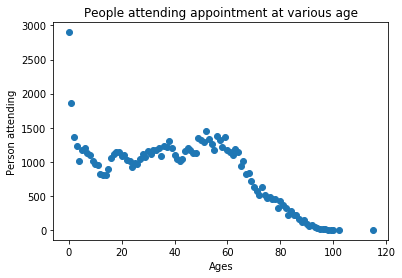

In [319]:
scatter(x_lab, b)
plt.title('People attending appointment at various age')
plt.xlabel('Ages')
plt.ylabel('Person attending')
show()

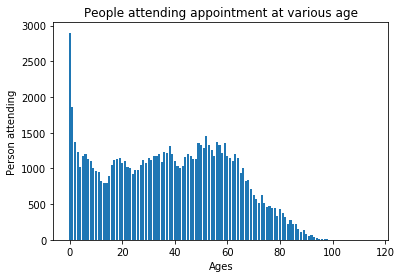

In [320]:
bar(x_lab, b)
plt.title('People attending appointment at various age')
plt.xlabel('Ages')
plt.ylabel('Person attending')
show()

### Based on waiting time

In [321]:
df['Waiting time'] = abs(df['Waiting time'])
x_labelling = sorted(df['Waiting time'].unique())


In [322]:
y_labelling = df[df['Noshow'] == "No"].groupby('Waiting time').count().Gender / df.groupby('Waiting time').count().Gender

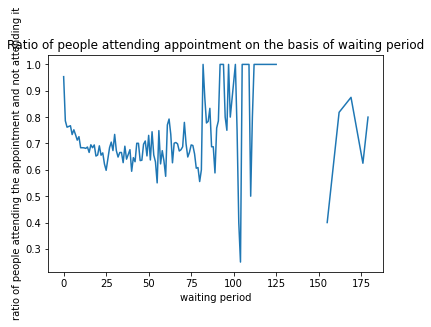

<Figure size 1440x720 with 0 Axes>

In [323]:
plot(x_labelling,y_labelling)
plt.title('Ratio of people attending appointment on the basis of waiting period')
plt.xlabel('waiting period')
plt.ylabel('ratio of people attending the appointment and not attending it')
plt.figure(figsize=(20,10));
show();

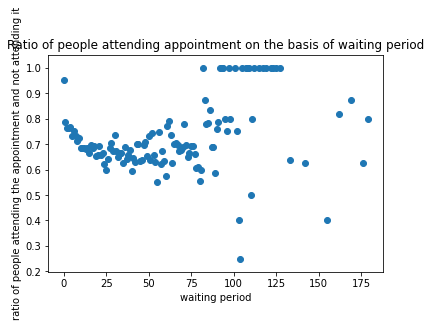

<Figure size 1440x720 with 0 Axes>

In [324]:
scatter(x_labelling,y_labelling)
plt.title('Ratio of people attending appointment on the basis of waiting period')
plt.xlabel('waiting period')
plt.ylabel('ratio of people attending the appointment and not attending it')
plt.figure(figsize=(20,10));
show();

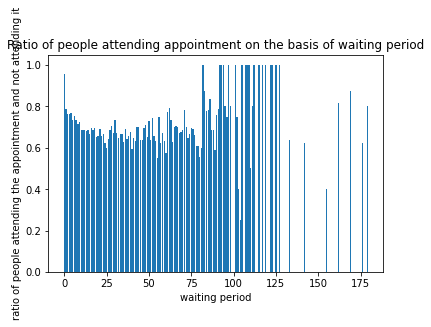

<Figure size 1440x720 with 0 Axes>

In [325]:
bar(x_labelling,y_labelling)
plt.title('Ratio of people attending appointment on the basis of waiting period')
plt.xlabel('waiting period')
plt.ylabel('ratio of people attending the appointment and not attending it')
plt.figure(figsize=(20,10));
show();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### People who are does not receive messages are more likely to attend appointments
### People with disease are more likely to attend appointment rather than who are suffering from some disease it seems like they are more concerned for their health
### Men are more likely to attend appointments rather than women it can be shown from the bar graph and line chart above
### Graph of people attending vs ages is right skewed means people at lower ages are more likely to go to appointments

### Young and high ages persons are more likely to show at the appointment


### Persons are likely to attend their appointments if they are less than half the maximum waiting period

### higher waiting period is directly proportional to no show at appoinments

### people at higher ages are more prone to disease that is why the show up more for appointments